In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("Cancer_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

пропусков нет! Столбец "Unnamed: 32" не будем учитывать - он пуст! Трансформируем данные столбца diagnosis в подходящие для обработки: M=0, B=1

In [4]:
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1}).astype(int)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_26348\4002784816.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1}).astype(int)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


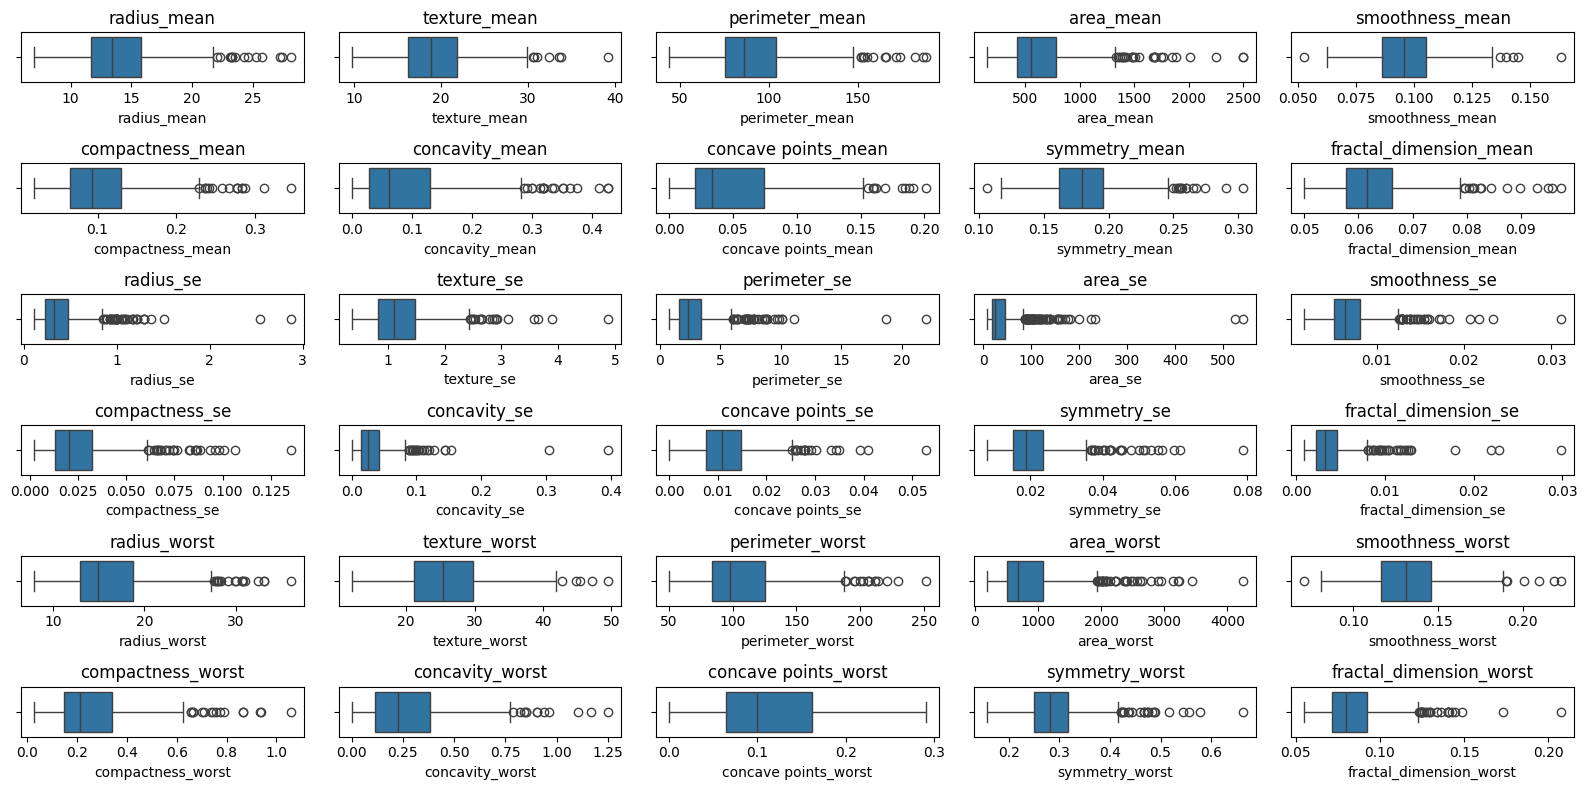

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(16, 8))
axes = axes.flatten()

for i in range(30):
    sns.boxplot(x=df.iloc[:, (i+2)], ax=axes[i])
    axes[i].set_title(f"{df.columns[(i+2)]}")

plt.tight_layout()
plt.show()

Встречаються выбросы! Поборемся с ними!

In [6]:
from scipy import stats

threshold = 2

for name,column in df.iloc[:,2:32].items():
    z_scores = stats.zscore(column)
    median_value = column.median()
    df.loc[abs(z_scores) > threshold, name] = median_value

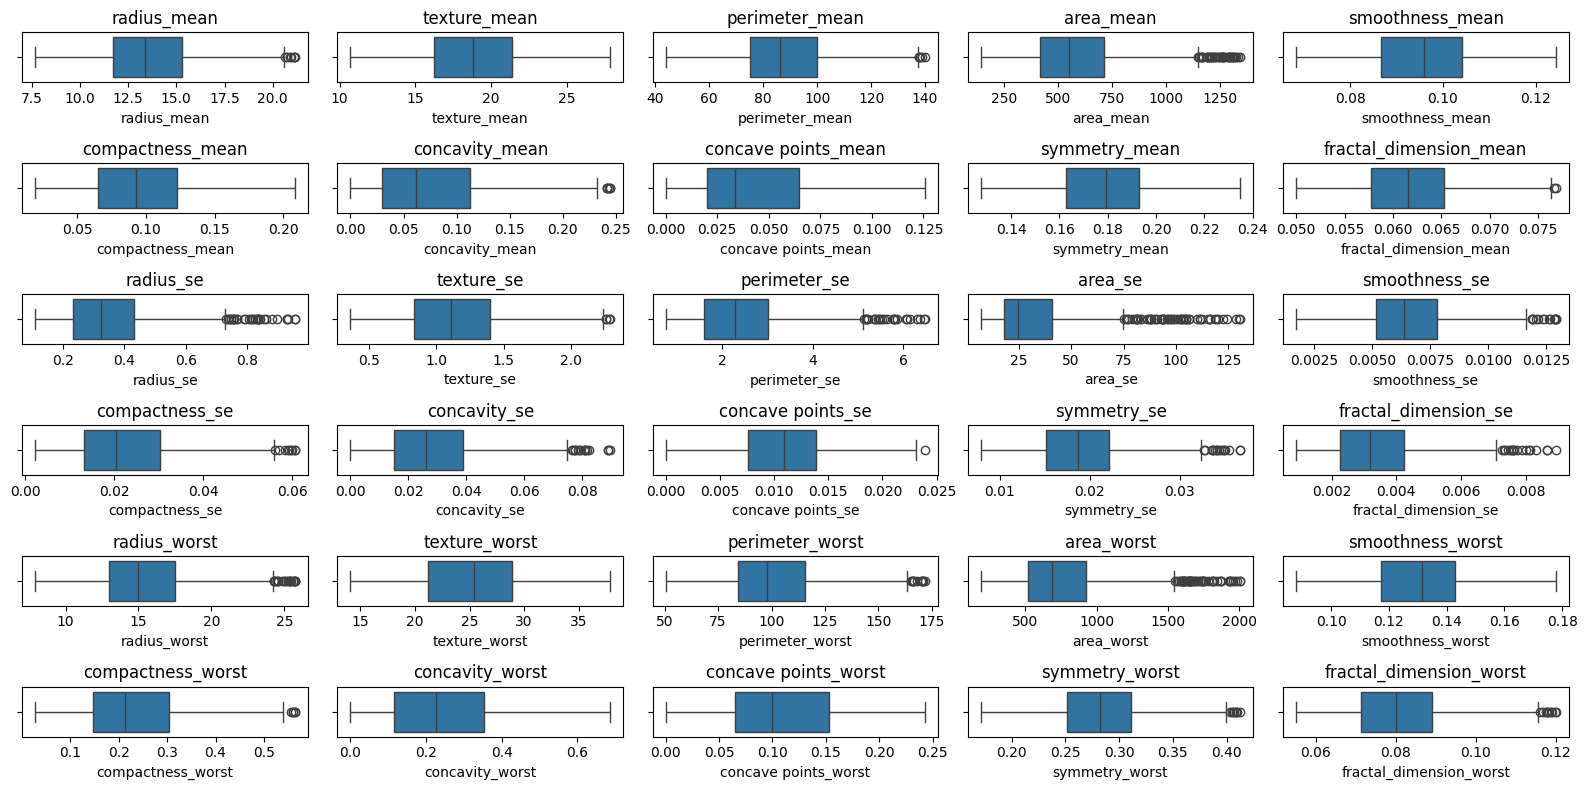

In [7]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(16, 8))
axes = axes.flatten()

for i in range(30):
    sns.boxplot(x=df.iloc[:, (i+2)], ax=axes[i])
    axes[i].set_title(f"{df.columns[(i+2)]}")

plt.tight_layout()
plt.show()

Поборолись!

Переходим к заданиям!

1. Определение скорости обучения
Используйте Cancer_Data для классификации. Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения).
Запишите и сравните результаты метрик качества и скорости сходимости модели.

In [8]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,2:32], df.iloc[:,1], test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
m_c=[]
m_time=[]
m_accuracy=[]
for i in range(1,1000,1):
    start_time = time.time()
    model= LogisticRegression(C=i/100, max_iter=1000)
    model.fit(X_train, y_train)
    model_time = time.time() - start_time
    accuracy = accuracy_score(y_test, model.predict(X_test))
    m_c.append(i/100)
    m_time.append(model_time)
    m_accuracy.append(accuracy)

res=pd.DataFrame({'m_c':m_c,'m_time':m_time,'m_accuracy':m_accuracy})

res.head()

,m_c,m_time,m_accuracy
0,0.01,0.007400,0.935673
1,0.02,0.000000,0.947368
2,0.03,0.016625,0.947368
3,0.04,0.000000,0.947368
4,0.05,0.009506,0.947368


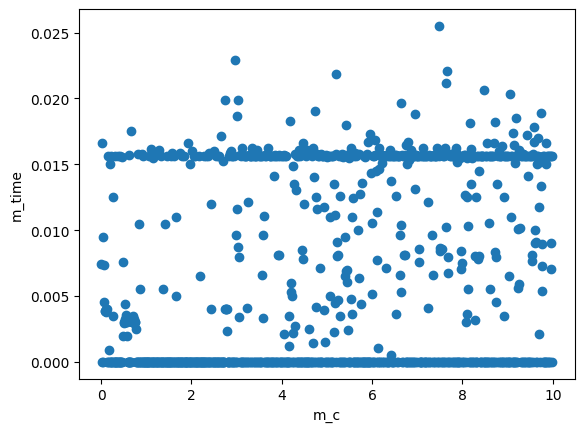

In [11]:
plt.scatter(x=res['m_c'],y=res['m_time'])
plt.xlabel('m_c')
plt.ylabel('m_time')
plt.show()

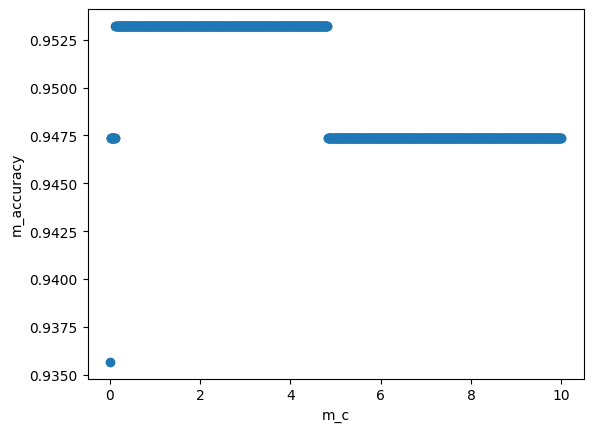

In [12]:
plt.scatter(x=res['m_c'],y=res['m_accuracy'])
plt.xlabel('m_c')
plt.ylabel('m_accuracy')
plt.show()

Четко видно, что с ростом С accuracy растет, но скорость сходимости не сказать что изменяется!

Переходим к градиентному спуску


2. Познакомиться с работой стохастического градиентного спуска.
Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD). Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском.

In [13]:
start_time = time.time()
model_gd = LogisticRegression(solver='lbfgs', max_iter=1000)
model_gd.fit(X_train, y_train)
gd_time = time.time() - start_time
gd_accuracy = accuracy_score(y_test, model_gd.predict(X_test))

# 2. Логистическая регрессия с SGD
start_time = time.time()
model_sgd = SGDClassifier(loss='log_loss', learning_rate='optimal', max_iter=1000)
model_sgd.fit(X_train, y_train)
sgd_time = time.time() - start_time
sgd_accuracy = accuracy_score(y_test, model_sgd.predict(X_test))

# Вывод результатов
print(f"Gradient Descent Time: {gd_time:.2f}s, Accuracy: {gd_accuracy:.2f}")
print(f"SGD Time: {sgd_time:.2f}s, Accuracy: {sgd_accuracy:.2f}")

Gradient Descent Time: 0.01s, Accuracy: 0.95
SGD Time: 0.00s, Accuracy: 0.95


Время и точность у "классического" выше!

3. Сравнить разные алгоритмы оптимизации.
— На исходном наборе данных обучить модель логистической регрессии, используя разные оптимизаторы, и сравнить их эффективность.

In [14]:
# Сравнение оптимизаторов
solvers = ['lbfgs', 'sag', 'saga', 'liblinear']
results = {}

for solver in solvers:
    start_time = time.time()
    model = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start_time
    accuracy = accuracy_score(y_test, model.predict(X_test))
    results[solver] = {'Accuracy': accuracy, 'Time': elapsed_time}

# Вывод результатов
for solver, metrics in results.items():
    print(f"Solver: {solver}, Accuracy: {metrics['Accuracy']:.2f}, Time: {metrics['Time']:.2f} seconds")

Solver: lbfgs, Accuracy: 0.95, Time: 0.01 seconds
Solver: sag, Accuracy: 0.95, Time: 0.02 seconds
Solver: saga, Accuracy: 0.95, Time: 0.04 seconds
Solver: liblinear, Accuracy: 0.95, Time: 0.00 seconds


In [ ]:
Точность одинаково высока, но saga в 4 раза медленнее классического!